In [21]:
# import the modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

### Load the dataset

- Load the train data and using all your knowledge try to explore the different statistical properties of the dataset.

In [22]:
train = pd.read_csv('../data/train.csv')
train.drop(columns = ['customer.id', 'Id'], axis = 1, inplace = True)
train['int.rate'] = train['int.rate'].apply(lambda x: float(str(x).replace("%","")))

cat_var_train = train.select_dtypes(exclude = 'number').columns
cat_var_train = cat_var_train.drop('paid.back.loan')

le = LabelEncoder()

for i in cat_var_train:
    train[i] = le.fit_transform(train[i])

train.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs,paid.back.loan
0,1,2,12.53,689.41,11.513725,14.45,722,4291.000000,13171,51.8,0,3,0,Yes
1,1,1,10.20,485.42,10.315597,12.87,752,5789.958333,14857,31.3,0,3,1,Yes
2,1,2,12.87,121.08,11.238436,1.58,692,3391.000000,12135,85.5,0,3,0,Yes
3,0,0,15.37,348.47,11.142007,11.01,687,5370.000000,10631,35.3,0,0,0,Yes
4,1,2,14.61,344.76,10.308953,11.36,672,2429.958333,10544,57.0,0,3,1,Yes


In [23]:
test = pd.read_csv('../data/test.csv')
id_ = test.Id
test.drop(columns = ['customer.id', 'Id'], axis = 1, inplace = True)
test['int.rate'] = test['int.rate'].apply(lambda x: float(str(x).replace("%","")))

cat_var_test = test.select_dtypes(exclude = 'number').columns

for i in cat_var_test:
    test[i] = le.fit_transform(test[i])

test.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,pub.rec,inq.last.6mths,delinq.2yrs
0,1,2,11.83,497.01,11.385092,19.70,732,6481.958333,32725,41.9,0,2,0
1,1,0,14.96,138.59,10.714418,1.79,682,1230.041667,1298,81.1,0,2,0
2,1,0,9.76,80.39,9.998798,22.25,737,2404.041667,2574,10.5,0,2,0
3,1,2,16.32,247.20,10.915088,3.99,662,2189.958333,4747,93.1,0,2,1
4,1,1,8.00,188.02,11.446786,13.27,752,2250.000000,7501,26.8,0,2,0


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Clean the data, apply some data preprocessing and engineering techniques.

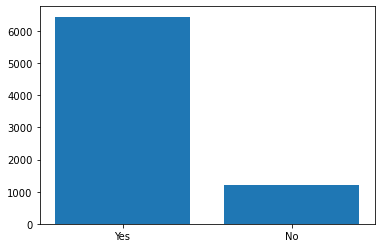

In [24]:
# Code starts here
#Storing value counts of target variable in 'fully_paid'
fully_paid=train['paid.back.loan'].value_counts()

#Plotting bar plot
plt.bar(fully_paid.index, fully_paid)
plt.show()
# Code ends here.

<AxesSubplot:xlabel='log.annual.inc', ylabel='Density'>

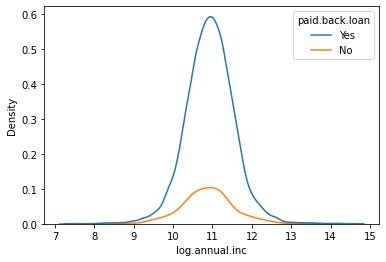

In [25]:
sns.kdeplot(train['log.annual.inc'], hue = train['paid.back.loan'])

### Model building

- Separate the features and target.
- Now let's come to the actual task, using Decision Tree, predict the `paid.back.loan`. Use different techniques you have learned to imporove the performance of the model.
- Try improving upon the `accuracy_score` ([Accuracy Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html))

In [26]:
# Code starts here

X = train.iloc[:,:-1]
y = train.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

dt = DecisionTreeClassifier(max_depth = 3)

dt.fit(X_train, y_train)
print(dt.score(X_test,y_test))

y_pred = dt.predict(X_test)

acc_score = accuracy_score(y_test, y_pred)
print(acc_score)


# Code ends here

0.8351457155284906
0.8351457155284906


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [28]:
# Code Starts here
res = dt.predict(test)
res
# sub = pd.DataFrame({'Id':id_,'paid.back.loan':res})
# submission = sub.to_csv('Submission.csv', index = False)


# Code ends here

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
       'Yes'], dtype=object)